In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('../datasets/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [6]:
print("null values:")
print(df.isnull().sum())

null values:
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


In [15]:
#handling missing values

diss_att = [0,1,2,3,5,11]
cont_att =[4,6,7,8,9,10]
for col in df.columns[:11]:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)


print(df.isna().sum())

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [34]:
#normalizing the data
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

# Apply normalization only to numeric columns
# Use iloc to access columns by integer position
for index in cont_att:
    df.iloc[:, index] = normalize(df.iloc[:, index])

#normalizing the data
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,False
1,Earth,False,F/0/S,TRAPPIST-1e,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,True
2,Europa,False,A/0/S,TRAPPIST-1e,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,False
4,Earth,False,F/1/S,TRAPPIST-1e,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.518987,True,0.000000,0.228726,0.000000,0.073322,0.003066,False
8689,Earth,True,G/1499/S,PSO J318.5-22,0.227848,False,0.000000,0.000000,0.000000,0.000000,0.000000,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,0.329114,False,0.000000,0.000000,0.079687,0.000045,0.000000,True
8691,Europa,False,E/608/S,55 Cancri e,0.405063,False,0.000000,0.035186,0.000000,0.015753,0.134049,False


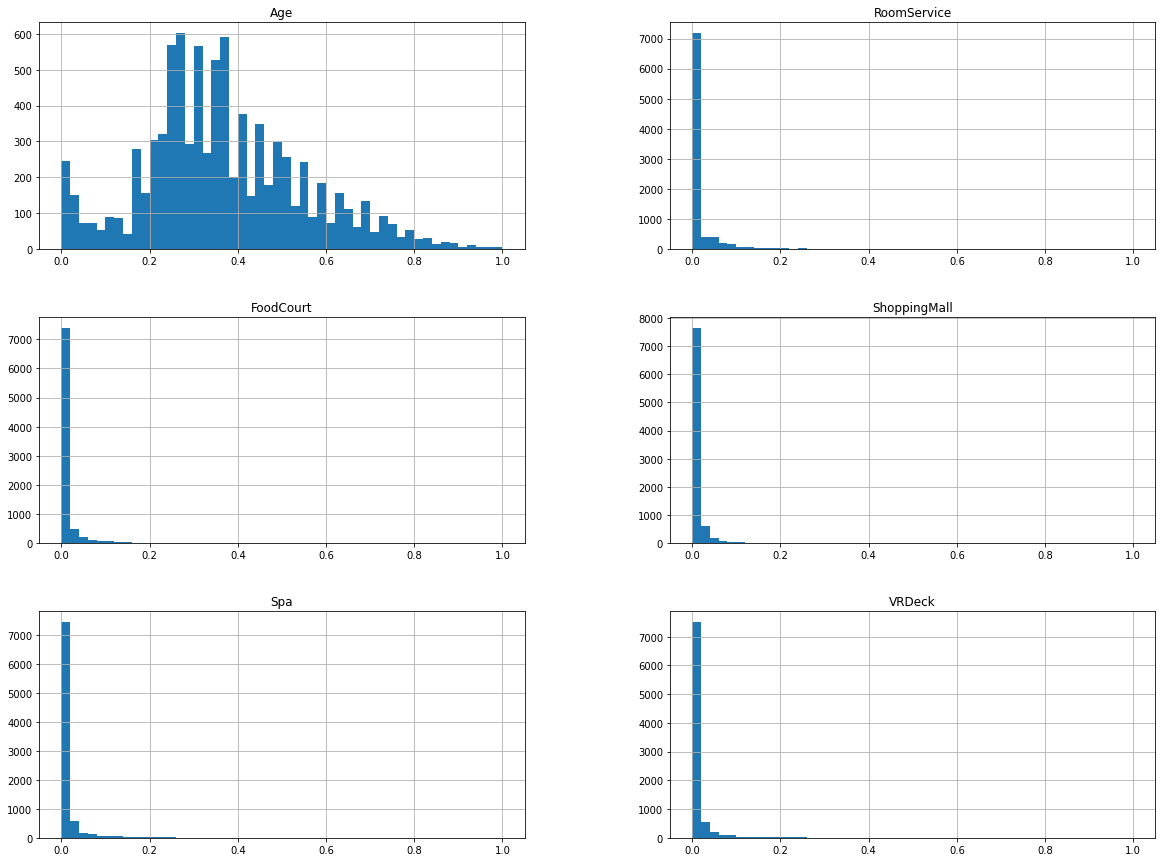

In [35]:
df.hist(bins=50, figsize=(20,15))
plt.show()

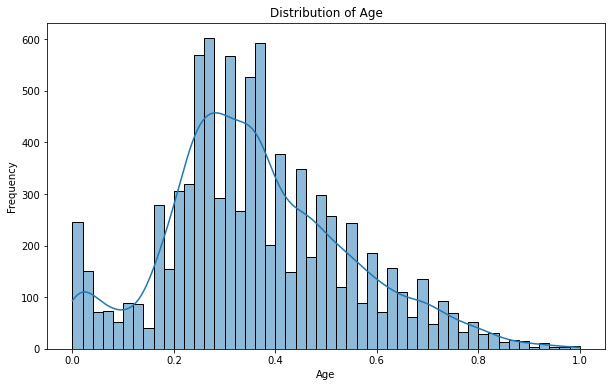

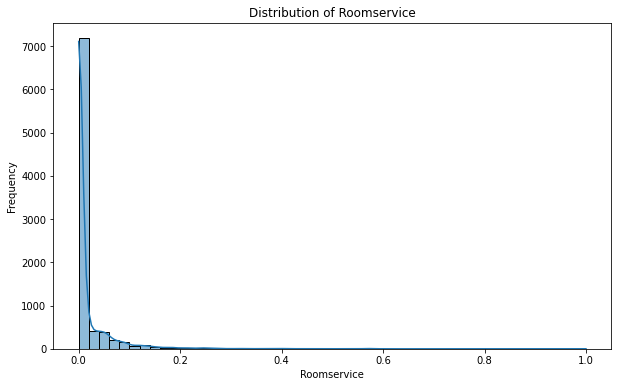

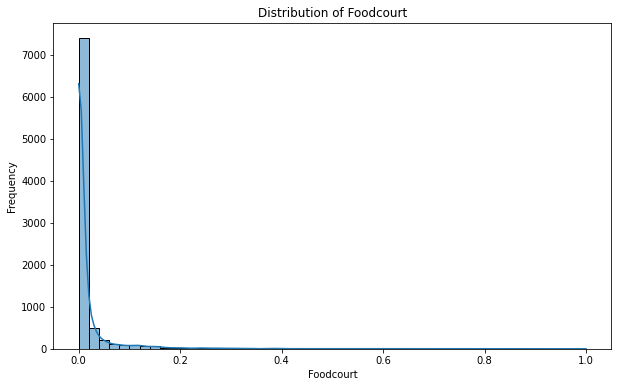

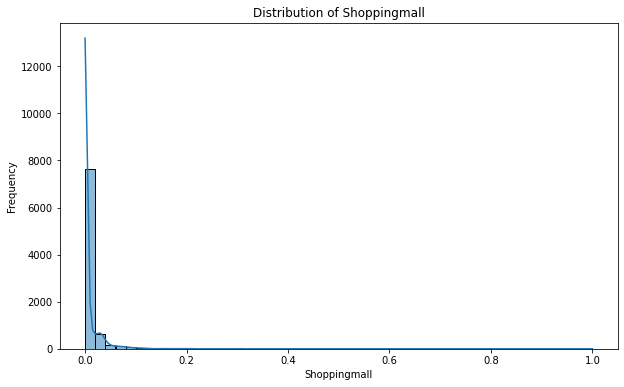

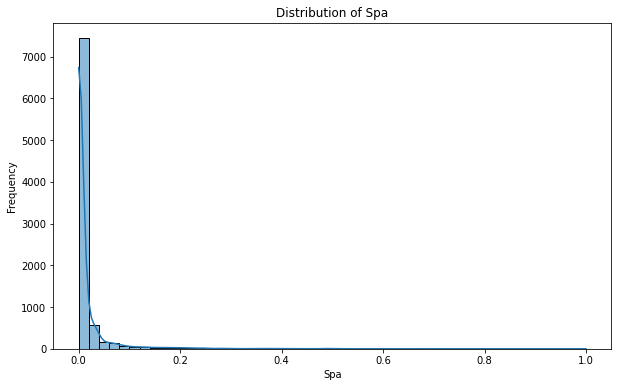

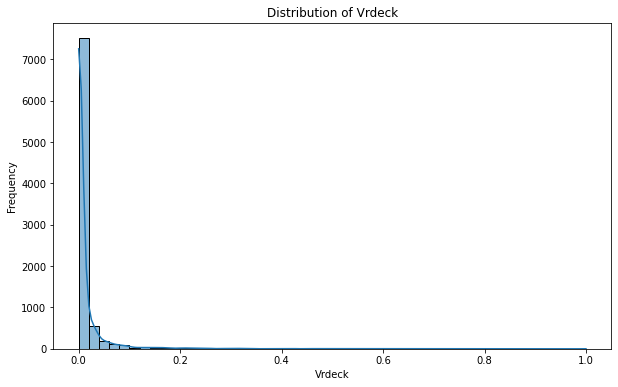

In [ ]:
#a distributiom for comt columns


for i in cont_att:
    col = df.columns[i]
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title('Distribution of '+ col.title())
    plt.xlabel(col.title())
    plt.ylabel('Frequency')
    plt.show()

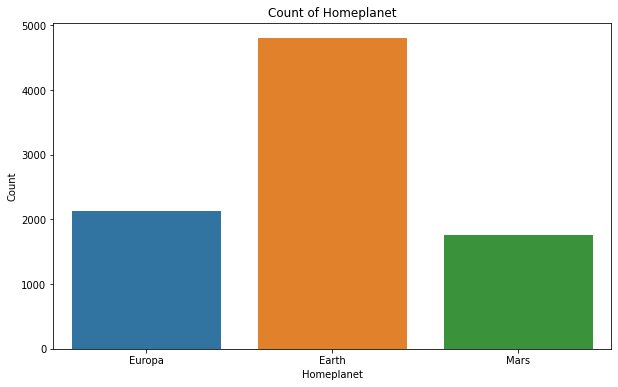

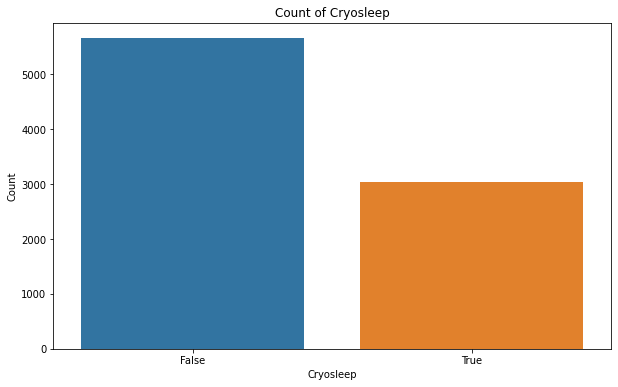

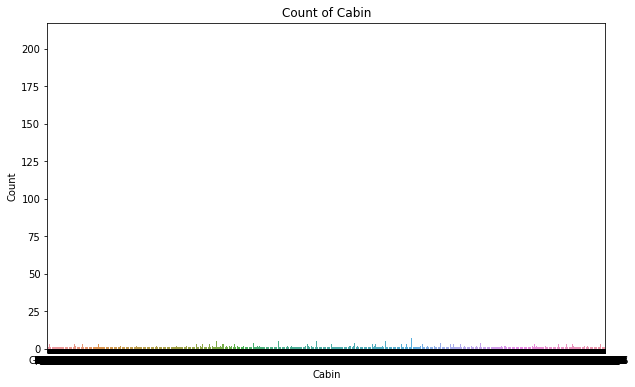

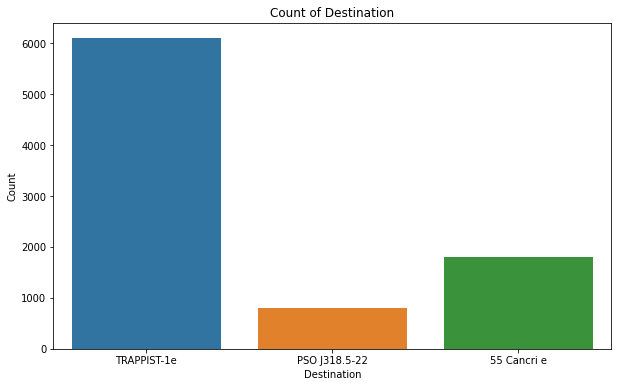

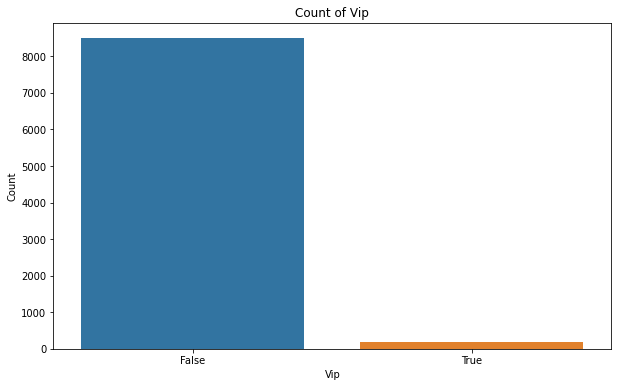

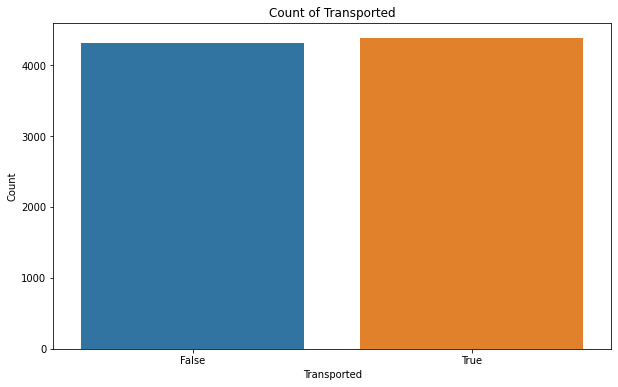

In [31]:
for index in diss_att:
    col = df.columns[index]
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col.title()}')   
    plt.xlabel(col.title())
    plt.ylabel('Count')
    plt.show()

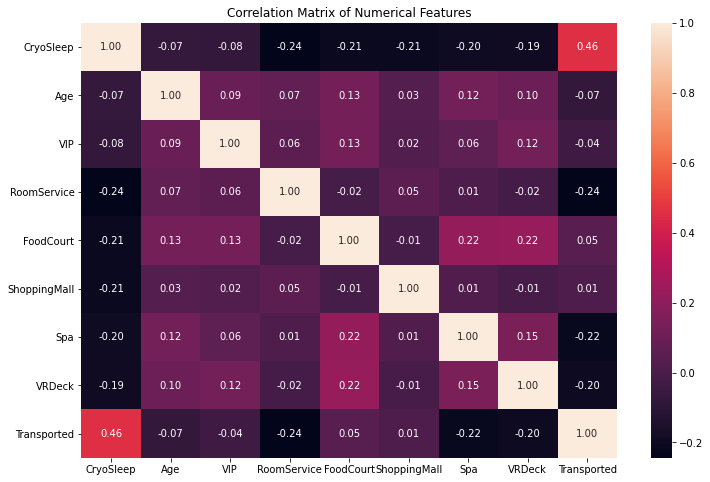

In [19]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()